In [1]:
import numpy as np  
import matplotlib.pyplot as plt    
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from scipy.io import loadmat
import pandas as pd
from pandas.plotting import table

In [2]:
from sklearn.datasets import load_iris,load_boston,load_diabetes, load_wine,load_digits
x, y = load_wine(return_X_y=True)
print('X shape:', x.shape)
print('Y shape:', y.shape)
number_runs = 25

X shape: (178, 13)
Y shape: (178,)


In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print("Training size:",x_train.shape[0])
print("Training size:",x_test.shape[0])

Training size: 142
Training size: 36


In [4]:
def score_adaboost(x_train, y_train, n_estimators=50, lr=1, loss='linear'):
    clf = AdaBoostRegressor(n_estimators=n_estimators, learning_rate=lr, loss=loss)
    clf.fit(x_train, y_train)
    return clf.score(x_test, y_test)
    
score_adaboost(x_train, y_train)

0.8945827232796486

### Number of estimators

[0.8814246589503536, 0.9099711496065949, 0.9153732908696501, 0.8980179376077159, 0.9136088426716763, 0.9084065756258068, 0.9126886201160215, 0.9059424380286936, 0.915634595712724]
[0.04199943959399092, 0.03497633044986416, 0.03557524380699595, 0.08376574496546699, 0.025254742778399113, 0.0268945682299663, 0.028515081292815426, 0.020922076976397346, 0.024713515166162166]


Text(0.5, 0, 'nº of estimators')

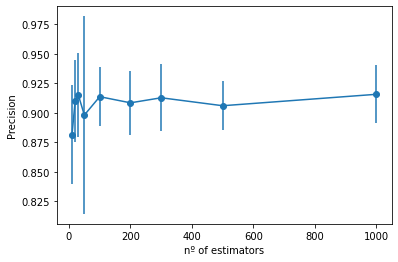

In [5]:
means = []
stds = []
ns = [10, 20, 30, 50, 100, 200,300,500, 1000]
for n in ns:
    prov = np.zeros(number_runs)
    for i in range(number_runs):
        prov[i] = score_adaboost(x_train, y_train,n_estimators=n)
    means.append(np.mean(prov))
    stds.append(np.std(prov))

print(means)
print(stds)
plt.errorbar(ns, means, stds,marker='o')
plt.ylabel("Precision")
plt.xlabel("nº of estimators")
    


### Learning Rate

[0.8861441013906898, 0.9048703192512074, 0.9072893723923993, 0.90644542053034, 0.8420099560761346, -0.03267935578330899]
[0.04131390146227858, 0.04223267084201967, 0.03071820601945628, 0.02141355975050804, 0.06982659147981114, 0.581682409486725]


Text(0.5, 0, 'Learning rate')

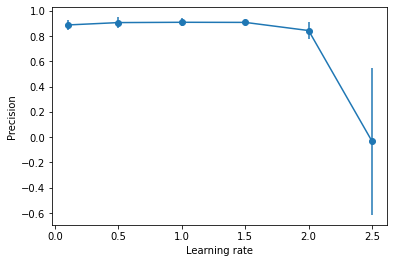

In [6]:
means = []
stds = []
lrs = [0.1, 0.5, 1, 1.5, 2, 2.5]
for l in lrs:
    prov = np.zeros(number_runs)
    for i in range(number_runs):
        prov[i] = score_adaboost(x_train, y_train,lr=l)
    means.append(np.mean(prov))
    stds.append(np.std(prov))

print(means)
print(stds)
plt.errorbar(lrs, means, stds,marker='o')
plt.ylabel("Precision")
plt.xlabel("Learning rate")

### Loss Function

[0.920738890339777, 0.921986917862405, 0.8968949844923632]
[0.029765861297551835, 0.026329101774004212, 0.034200489625014235]


Text(0.5, 0, 'Loss function')

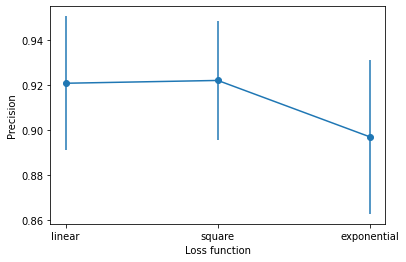

In [7]:
means = []
stds = []
error = ['linear', 'square', 'exponential']
for f in error:
    prov = np.zeros(number_runs)
    for i in range(number_runs):
        prov[i] = score_adaboost(x_train, y_train,loss=f)
    means.append(np.mean(prov))
    stds.append(np.std(prov))

print(means)
print(stds)
plt.errorbar(error, means, stds,marker='o')
plt.ylabel("Precision")
plt.xlabel("Loss function")

### Training Split

[0.9886451461697622, 0.9414357731051827, 0.9413861333400948, 0.9496467244357553, 0.9262491315560645, 0.8804322209802848, 0.6758749574052783]
[0.05509432823602954, 0.0791268010275542, 0.04613352245320213, 0.04002322465589788, 0.05285718902713922, 0.04858077925286453, 0.158809794852753]


Text(0.5, 0, '% of test samples')

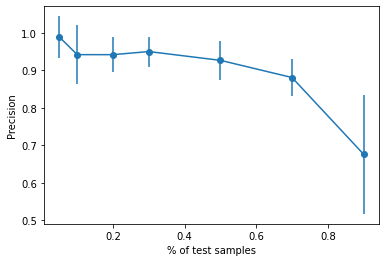

In [8]:
means = []
stds = []
splits = [0.05,0.1,0.2,0.3,0.5,0.7,0.9]
for s in splits:
    prov = np.zeros(number_runs)
    for i in range(number_runs):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=s)
        prov[i] = score_adaboost(x_train, y_train)
    means.append(np.mean(prov))
    stds.append(np.std(prov))

print(means)
print(stds)
plt.errorbar(splits, means, stds,marker='o')
plt.ylabel("Precision")
plt.xlabel("% of test samples")